In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [14]:
df = pd.read_csv("C:/Users/Dzilaj Bilaj/Desktop/genres/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [16]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [19]:
df.shape

(9990, 59)

In [18]:
df = df.drop(labels="filename", axis=1)

In [20]:
# Test on a single file

audio_recording = "C:/Users/Dzilaj Bilaj/Desktop/genres/country/country.00050.wav"
data, sr = librosa.load(audio_recording)

In [22]:
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [23]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
        -0.11823352, -0.05911855], dtype=float32),
 45600)

In [31]:
# Audio(data, rate=sr)

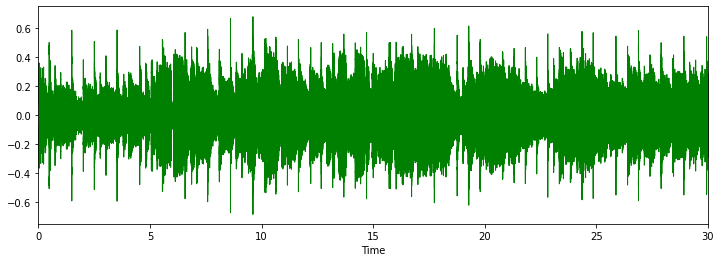

In [33]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, color="green")
plt.show()

In [37]:
# Feature extraction

class_list = df.iloc[:, -1]

In [41]:
y = LabelEncoder().fit_transform(class_list)
print(y)

[0 0 0 ... 9 9 9]


In [42]:
print(df.iloc[:, ])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [47]:
X = StandardScaler().fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(len(y_train), len(y_test))

6693 3297


In [50]:
# Model

def trainModel(model, epochs, optimizer):
    BATCH_SIZE = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy')
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=BATCH_SIZE)

In [51]:
def plotValidate(history):
    print("Validation acc:", max(history.history['val_accuracy']))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),          # Dropout is used to prevent overfitting

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation='softmax')
])

In [58]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               30208     
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [60]:
model_history = trainModel(model=model, epochs=10, optimizer='adam')

Epoch 1/10
53/53 [==============================] - 1s 7ms/step - loss: 0.4115 - accuracy: 0.8612 - val_loss: 0.4288 - val_accuracy: 0.8577
Epoch 2/10
53/53 [==============================] - 0s 5ms/step - loss: 0.3469 - accuracy: 0.8870 - val_loss: 0.4271 - val_accuracy: 0.8568
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.8924 - val_loss: 0.3868 - val_accuracy: 0.8732
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.9023 - val_loss: 0.3893 - val_accuracy: 0.8720
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.9054 - val_loss: 0.3969 - val_accuracy: 0.8708
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.9123 - val_loss: 0.3913 - val_accuracy: 0.8723
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.2469 - accuracy: 0.9190 - val_loss: 0.3550 - val_accuracy: 0.8914
Epoch 8/10
53/53 [==

In [62]:
# Evaluation

test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print(test_loss)
print(test_acc)

26/26 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8863
0.38051435351371765
0.8862602114677429
